# 21기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [4]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [5]:
df = df.drop(labels='Product_Category_3',axis=1)
df = df.drop('User_ID', axis=1)
df = df.drop('Product_ID', axis=1)

## 2. KNN 구현 & 파라미터 튜닝

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(pd.DataFrame(df['Product_Category_2']))


df['Product_Category_2'] = imputer.transform(pd.DataFrame(df['Product_Category_2']))

In [8]:
imputer = imputer.fit(pd.DataFrame(df['Marital_Status']))
df['Marital_Status'] = imputer.transform(pd.DataFrame(df['Marital_Status']))

In [9]:
len(df['Product_Category_2'].unique())

17

In [11]:
from sklearn.preprocessing import  OneHotEncoder

df.loc[:, 'Gender'] = np.where(df['Gender'] == 'M', 1, 0)

#renaming some columns 
df = df.rename(columns={
                #'Product_ID': 'ProductClass',
                'Product_Category_1': 'Category1',
                'Product_Category_2': 'Category2',
                'City_Category': 'City',
                'Stay_In_Current_City_Years': 'City_Stay'
})

cats = ['Occupation', 'Age', 'City', 'Category1','Category2','City_Stay']

#creating the encoder, fit it to our data 
encoder = OneHotEncoder().fit(df[cats])

In [14]:
encoder.get_feature_names_out()

array(['Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'City_A', 'City_B', 'City_C',
       'Category1_1', 'Category1_2', 'Category1_3', 'Category1_4',
       'Category1_5', 'Category1_6', 'Category1_7', 'Category1_8',
       'Category1_9', 'Category1_10', 'Category1_11', 'Category1_12',
       'Category1_13', 'Category1_14', 'Category1_15', 'Category1_16',
       'Category1_17', 'Category1_18', 'Category1_19', 'Category1_20',
       'Category2_2.0', 'Category2_3.0', 'Category2_4.0', 'Category2_5.0',
       'Category2_6.0', 'Category2_7.0', 'Category2_8.0', 'Catego

In [17]:
endcoded_data = pd.DataFrame(encoder.transform(df[cats]).toarray(),index=df.index, columns=encoder.get_feature_names_out())
endcoded_data.head()

,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,...,Category2_14.0,Category2_15.0,Category2_16.0,Category2_17.0,Category2_18.0,City_Stay_0,City_Stay_1,City_Stay_2,City_Stay_3,City_Stay_4+
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df = pd.concat([df, endcoded_data],sort=False,axis=1)

df=df.drop(cats, axis=1)

In [19]:
df

,Gender,Marital_Status,Purchase,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,...,Category2_14.0,Category2_15.0,Category2_16.0,Category2_17.0,Category2_18.0,City_Stay_0,City_Stay_1,City_Stay_2,City_Stay_3,City_Stay_4+
0,0,0,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,4483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,7696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,16429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,5780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1,1,11701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4994,1,1,2045,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4995,1,1,4505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4996,1,1,1413,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df = df.fillna(0)
df.head(15)

/var/folders/f2/djy34npd0sd27zzb2_6gnjvh0000gn/T/ipykernel_57945/2192459138.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,Gender,Marital_Status,Purchase,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,...,Category2_14.0,Category2_15.0,Category2_16.0,Category2_17.0,Category2_18.0,City_Stay_0,City_Stay_1,City_Stay_2,City_Stay_3,City_Stay_4+
0,0,0,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,4483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,7696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,16429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,5780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,0,9821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0,0,12707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,0,7108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0,0,16521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0,0,1886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
X = df.drop('Gender',axis=1)
y = df.pop('Gender')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.25)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [24]:
knn.score(X_test,y_test)

0.72

In [25]:
# 하이퍼 파라미터 튜닝 with Grid Search
parameters = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : [18,20,25,27,30,32,34],
                'n_neighbors' : [3,5,7,9,10,11,12,13]
               }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(knn, parameters,verbose=3)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.747 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.749 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.743 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.741 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.753 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.735 total time=   0.1s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.753 total time=   0.1s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.747 total time=   0.1s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.741 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.784 total 

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 13}

In [26]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =13)
knn.fit(X_train,y_train)

0.732

## 3. Evaluation

In [28]:
pred = knn.predict(X_test)

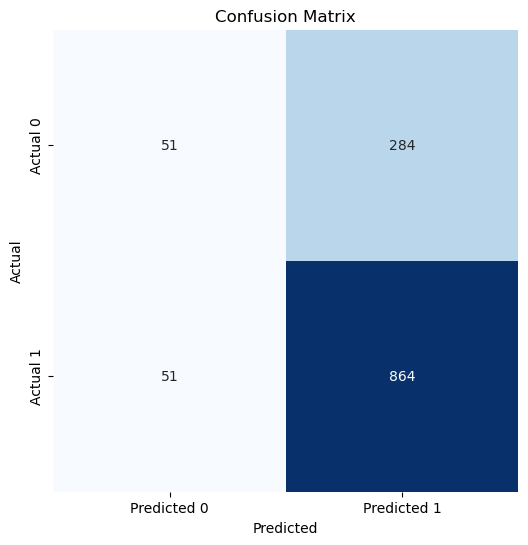

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()